In [4]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import datetime as dt

In [5]:
# Read in the dataset
airbnb = pd.read_csv('https://github.com/adelnehme/python-for-spreadsheet-users-webinar/blob/master/datasets/airbnb.csv?raw=true', index_col = 'Unnamed: 0')

In [6]:
airbnb

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10014,22307861,Lovely 1BR Harlem apartment,16004068,Rachel,"Manhattan, Harlem","(40.80379, -73.95257)",Entire home/apt,105$,4,2018-05-28,0.21,0,4.757555,4.8,0.639223,2017-11-22
10015,953275,Apartment For Your Holidays in NYC!,4460034,Alain,"Manhattan, East Harlem","(40.79531, -73.9333)",Entire home/apt,125$,50,2018-05-06,0.66,188,4.344704,60.0,0.648778,2017-10-31
10016,3452835,"Artsy, Garden Getaway in Central Brooklyn",666862,Amy,"Brooklyn, Clinton Hill","(40.68266, -73.96743000000002)",Entire home/apt,100$,45,2016-11-27,0.98,0,3.966214,54.0,0.631713,2016-05-24
10017,23540194,"Immaculate townhouse in Clinton Hill, Brooklyn",67176930,Sophie,"Brooklyn, Clinton Hill","(40.68832, -73.96366)",Entire home/apt,450$,2,2019-05-31,0.17,99,4.078581,2.4,0.703360,2018-11-25


Some important and common methods needed to get a better understanding of DataFrames and diagnose potential data problems are the following: 

- `.head()` prints the header of a DataFrame
- `.dtypes` prints datatypes of all columns in a DataFrame
- `.info()` provides a bird's eye view of column data types and missing values in a DataFrame
- `.describe()` returns a distribution of numeric columns in your DataFrame
- `.isna().sum()` allows us to break down the number of missing values per column in our DataFrame
- `.unique()` finds the number of unique values in a DataFrame column

<br>

- `sns.displot()` plots the distribution of one column in your DataFrame.

In [9]:
# first five rows of the data
# airbnb.head(20)

# bottom five rows of the data
# airbnb.tail()


,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
10014,22307861,Lovely 1BR Harlem apartment,16004068,Rachel,"Manhattan, Harlem","(40.80379, -73.95257)",Entire home/apt,105$,4,2018-05-28,0.21,0,4.757555,4.8,0.639223,2017-11-22
10015,953275,Apartment For Your Holidays in NYC!,4460034,Alain,"Manhattan, East Harlem","(40.79531, -73.9333)",Entire home/apt,125$,50,2018-05-06,0.66,188,4.344704,60.0,0.648778,2017-10-31
10016,3452835,"Artsy, Garden Getaway in Central Brooklyn",666862,Amy,"Brooklyn, Clinton Hill","(40.68266, -73.96743000000002)",Entire home/apt,100$,45,2016-11-27,0.98,0,3.966214,54.0,0.631713,2016-05-24
10017,23540194,"Immaculate townhouse in Clinton Hill, Brooklyn",67176930,Sophie,"Brooklyn, Clinton Hill","(40.68832, -73.96366)",Entire home/apt,450$,2,2019-05-31,0.17,99,4.078581,2.4,0.703360,2018-11-25
10018,32876011,Private room in a perfect location in the city,59583716,Shai,"Manhattan, Upper East Side","(40.76174, -73.96625)",Private room,90$,1,2019-03-12,0.25,8,4.069096,1.2,0.720249,2018-09-06


In [25]:
# airbnb.dtypes
# airbnb.describe()
# airbnb

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
dtype: object

In [27]:
# To find all the missing value
airbnb.isna().sum()

listing_id               0
name                     5
host_id                  0
host_name                2
neighbourhood_full       0
coordinates              0
room_type                0
price                  238
number_of_reviews        0
last_review           2075
reviews_per_month     2075
availability_365         0
rating                2075
number_of_stays       2075
5_stars               2075
listing_added            0
dtype: int64

* As per the data we can see that number
* 

In [17]:
airbnb.columns

Index(['listing_id', 'name', 'host_id', 'host_name', 'neighbourhood_full',
       'coordinates', 'room_type', 'price', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'availability_365', 'rating', 'number_of_stays',
       '5_stars', 'listing_added'],
      dtype='object')

In [22]:
#room_type
# airbnb['room_type'].unique()

# airbnb['room_type'].value_counts()


airbnb['rating'].max()

5.181114075085006

By merely looking at the data, we can already diagnose a range of potential problems down the line such as:

<br>

_Data type problems:_

- **Problem 1**: We can see that the `coordinates` column is probably a string (`str`) - most mapping functions require a latitude input, and longitude input, so it's best to split this column into two and convert the values to `float`.
- **Problem 2**: Similar to `coordinates` - the `price` column also is a string with `$` attached to each price point, we need to convert that to `float` if we want a good understanding of the dataset. 
- **Problem 3**: We need to make sure date columns (`last_review` and `listing_added`) are in `datetime` to allow easier manipulation of data data.

<br>

_Missing data problems:_

- **Problem 4**: We can see that there are missing data in some columns, we'll get a better bird's eye view of that down the line.

<br>

_Text/categorical data problems:_


- **Problem 5**: To be able to visualize number of listings by boroughs - we need to separate neighborhoud name from borough name in `neighbourhood_full` column.
- **Problem 6**: Looking at `room_type`, let's replace those values to make them `'Shared Room'`, `'Private Home/Apartment'`, `'Private Room'` and `'Hotel Room'`.

In [28]:
airbnb

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10014,22307861,Lovely 1BR Harlem apartment,16004068,Rachel,"Manhattan, Harlem","(40.80379, -73.95257)",Entire home/apt,105$,4,2018-05-28,0.21,0,4.757555,4.8,0.639223,2017-11-22
10015,953275,Apartment For Your Holidays in NYC!,4460034,Alain,"Manhattan, East Harlem","(40.79531, -73.9333)",Entire home/apt,125$,50,2018-05-06,0.66,188,4.344704,60.0,0.648778,2017-10-31
10016,3452835,"Artsy, Garden Getaway in Central Brooklyn",666862,Amy,"Brooklyn, Clinton Hill","(40.68266, -73.96743000000002)",Entire home/apt,100$,45,2016-11-27,0.98,0,3.966214,54.0,0.631713,2016-05-24
10017,23540194,"Immaculate townhouse in Clinton Hill, Brooklyn",67176930,Sophie,"Brooklyn, Clinton Hill","(40.68832, -73.96366)",Entire home/apt,450$,2,2019-05-31,0.17,99,4.078581,2.4,0.703360,2018-11-25


There are a variety of ways of dealing with missing data that is dependent on type of missingness, as well as the business assumptions behind our data - our options could be:

- Dropping missing data (if the data dropped does not impact or skew our data)
- Setting to missing and impute with statistical measures (median, mean, mode ...)
- Imputing with more complex algorithmic/machine learning based approaches
- Impute based on business assumptions of our data

## **Our to do list:**

_Data type problems:_

- **Task 1**: Split `coordinates` into 2 columns and convert them to `float`
- **Task 2**: Remove `$` from `price` and convert it to `float`
- **Task 3**: Convert `listing_added` and `last_review` to `datetime`

<br>

_Text/categorical data problems:_

- **Task 4**: We need to collapse `room_type` into correct categories
- **Task 5**: Divide `neighbourhood_full` into 2 columns and making sure they are clean

<br>

_Data range problems:_

- **Task 6**: Make sure we set the correct maximum for `rating` column out of range values

<br>

_Dealing with missing data:_

- **Task 7**: Understand the type of missingness, and deal with the missing data in most of the remaining columns. 

<br>

_Is that all though?_

- We need to investigate if we duplicates in our data
- We need to make sure that data makes sense by applying some sanity checks on our DataFrame 

In [32]:
airbnb['rating'].max()

5.181114075085006

##### **Task 1:** Replace `coordinates` with `latitude` and `longitude` columns

To perform this task, we will use the following methods:

- `.str.replace("","")` replaces one string in each row of a column with another
- `.str.split("")` takes in a string and lets you split a column into two based on that string
- `.astype()` lets you convert a column from one type to another

In [42]:
# Remove "(" and ")" from coordinates
airbnb['coordinates'] = airbnb['coordinates'].str.replace("(","")
airbnb['coordinates'] = airbnb['coordinates'].str.replace(")","")
# Print the header of the column
airbnb['coordinates'].head()

0    40.63222, -73.93398
1    40.78761, -73.96862
2     40.7007, -73.99517
3    40.79169, -73.97498
4    40.71884, -73.98354
Name: coordinates, dtype: object

In [53]:
# Split column into two
lat_long = airbnb['coordinates'].str.split(",", expand = True)
lat_long.head()

,0,1
0,40.63222,-73.93398
1,40.78761,-73.96862
2,40.7007,-73.99517
3,40.79169,-73.97498
4,40.71884,-73.98354


In [54]:
# Assign correct columns to latitude and longitude columns in airbnb
airbnb['latitude'] = lat_long[0]
airbnb['longitude'] = lat_long[1]
# Print the header and confirm new column creation
airbnb.head()

,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","40.63222, -73.93398",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","40.78761, -73.96862",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","40.7007, -73.99517",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.7007,-73.99517
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","40.79169, -73.97498",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","40.71884, -73.98354",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354


In [56]:
# Convert latitude and longitude to float
airbnb['latitude'] = airbnb['latitude'].astype('float')
airbnb['longitude'] = airbnb['longitude'].astype('float')
# Print dtypes again
airbnb.dtypes

listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude              float64
longitude             float64
dtype: object

In [60]:
airbnb.drop(['coordinates'], axis=1, inplace= True)

In [61]:
airbnb

,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.70070,-73.99517
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10014,22307861,Lovely 1BR Harlem apartment,16004068,Rachel,"Manhattan, Harlem",Entire home/apt,105$,4,2018-05-28,0.21,0,4.757555,4.8,0.639223,2017-11-22,40.80379,-73.95257
10015,953275,Apartment For Your Holidays in NYC!,4460034,Alain,"Manhattan, East Harlem",Entire home/apt,125$,50,2018-05-06,0.66,188,4.344704,60.0,0.648778,2017-10-31,40.79531,-73.93330
10016,3452835,"Artsy, Garden Getaway in Central Brooklyn",666862,Amy,"Brooklyn, Clinton Hill",Entire home/apt,100$,45,2016-11-27,0.98,0,3.966214,54.0,0.631713,2016-05-24,40.68266,-73.96743
10017,23540194,"Immaculate townhouse in Clinton Hill, Brooklyn",67176930,Sophie,"Brooklyn, Clinton Hill",Entire home/apt,450$,2,2019-05-31,0.17,99,4.078581,2.4,0.703360,2018-11-25,40.68832,-73.96366



##### **Task 2:** Remove `$` from `price` and convert it to `float`
To perform this task, we will be using the following methods:

- `.str.strip()` which removes a specified string from each row in a column
- `.astype()`

In [68]:
airbnb['price'] = airbnb['price'].str.strip('$')
airbnb['price'] = airbnb['price'].astype("float")

In [73]:
airbnb['price'].min()

airbnb['price']

0.0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


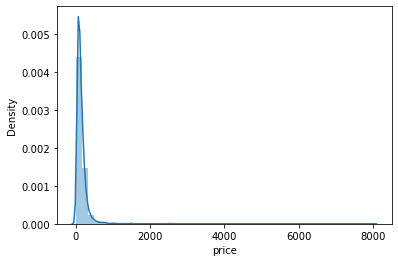

In [75]:
# Visualize distribution of prices
sns.distplot(airbnb['price'])
plt.show()

To perform this task, we will use the following functions:

- `pd.to_datetime(format = "")`
  - `format` takes in the desired date format `"%Y-%m-%d"`

In [80]:
# Print header of two columns
airbnb[['listing_added', 'last_review']].head()
# airbnb.dtypes

,listing_added,last_review
0,2018-06-08,2018-12-12
1,2018-12-25,2019-06-30
2,2018-08-15,NaN
3,2017-03-20,2017-09-23
4,2020-10-23,2019-06-12


In [81]:
# Convert both columns to datetime
airbnb['listing_added'] = pd.to_datetime(airbnb['listing_added'], format = '%Y-%m-%d')
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'], format = '%Y-%m-%d')

In [83]:
airbnb

,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands",Private room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side",Entire home/apt,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights",Entire home/apt,150.0,0,NaT,NaN,65,NaN,NaN,NaN,2018-08-15,40.70070,-73.99517
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side",Entire home/apt,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10014,22307861,Lovely 1BR Harlem apartment,16004068,Rachel,"Manhattan, Harlem",Entire home/apt,105.0,4,2018-05-28,0.21,0,4.757555,4.8,0.639223,2017-11-22,40.80379,-73.95257
10015,953275,Apartment For Your Holidays in NYC!,4460034,Alain,"Manhattan, East Harlem",Entire home/apt,125.0,50,2018-05-06,0.66,188,4.344704,60.0,0.648778,2017-10-31,40.79531,-73.93330
10016,3452835,"Artsy, Garden Getaway in Central Brooklyn",666862,Amy,"Brooklyn, Clinton Hill",Entire home/apt,100.0,45,2016-11-27,0.98,0,3.966214,54.0,0.631713,2016-05-24,40.68266,-73.96743
10017,23540194,"Immaculate townhouse in Clinton Hill, Brooklyn",67176930,Sophie,"Brooklyn, Clinton Hill",Entire home/apt,450.0,2,2019-05-31,0.17,99,4.078581,2.4,0.703360,2018-11-25,40.68832,-73.96366



##### **Task 4:** We need to collapse `room_type` into correct categories
To perform this task, we will be using the following methods:

- `.str.lower()` to lowercase all rows in a string column
- `.str.strip()` to remove all white spaces of each row in a string column
- `.replace()` to replace values in a column with another

In [92]:
airbnb['room_type'].value_counts()

Entire place    5186
Private Room    4607
Shared room      226
Name: room_type, dtype: int64

In [89]:
airbnb['room_type'] = airbnb['room_type'].str.lower()
airbnb['room_type'] = airbnb['room_type'].str.strip()

In [91]:
# Replace values to 'Shared room', 'Entire place', 'Private room' and 'Hotel room' (if applicable).
# Deal with capitalized values
mappings = {'private room': 'Private Room', 
            'private': 'Private Room',
            'entire home/apt': 'Entire place',
            'shared room': 'Shared room',
            'home': 'Entire place'}

# Replace values and collapse data
airbnb['room_type'] = airbnb['room_type'].replace(mappings)
# airbnb['room_type'].unique()

##### **Task 5:** Divide `neighbourhood_full` into 2 columns and making sure they are clean

In [94]:
# Split neighbourhood_full
borough_neighbourhood = airbnb['neighbourhood_full'].str.split(",", expand = True)


# Create borough and neighbourhood columns
airbnb['borough'] = borough_neighbourhood[0]
airbnb['neighbourhood'] = borough_neighbourhood[1]
# Print header of columns
airbnb[['neighbourhood_full', 'borough', 'neighbourhood']]

,neighbourhood_full,borough,neighbourhood
0,"Brooklyn, Flatlands",Brooklyn,Flatlands
1,"Manhattan, Upper West Side",Manhattan,Upper West Side
2,"Brooklyn, Brooklyn Heights",Brooklyn,Brooklyn Heights
3,"Manhattan, Upper West Side",Manhattan,Upper West Side
4,"Manhattan, Lower East Side",Manhattan,Lower East Side
...,...,...,...
10014,"Manhattan, Harlem",Manhattan,Harlem
10015,"Manhattan, East Harlem",Manhattan,East Harlem
10016,"Brooklyn, Clinton Hill",Brooklyn,Clinton Hill
10017,"Brooklyn, Clinton Hill",Brooklyn,Clinton Hill


In [96]:
airbnb.drop(['neighbourhood_full'], axis=1, inplace=True)

In [100]:
# Print out unique values of borough and neighbourhood
# print(airbnb['borough'].unique())
# print(airbnb['neighbourhood'].unique())


airbnb['neighbourhood'].value_counts()

airbnb['borough'].value_counts()

Manhattan        4449
Brooklyn         4086
Queens           1182
Bronx             229
Staten Island      73
Name: borough, dtype: int64

In [ ]:
# Strip white space from neighbourhood column
airbnb['neighbourhood'] = airbnb['neighbourhood'].str.strip()
# Print unique values again
print(airbnb['neighbourhood'].unique())

In [105]:
# airbnb['borough'].value_counts()
# airbnb['neighbourhood'].value_counts()


 Bedford-Stuyvesant    777
 Williamsburg          766
 Harlem                541
 Bushwick              502
 Hell's Kitchen        405
                      ... 
 Graniteville            1
 Baychester              1
 Midland Beach           1
 Oakwood                 1
 Mill Basin              1
Name: neighbourhood, Length: 198, dtype: int64

##### **Task 6:** Make sure we set the correct maximum for `rating` column out of range values

In [110]:
# airbnb['rating'].max()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


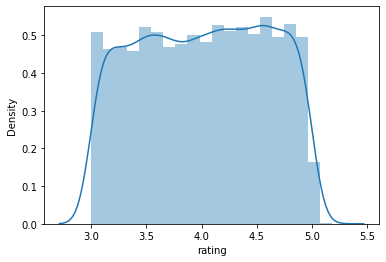

In [111]:
# Visualize the rating column again
sns.distplot(airbnb['rating'], bins = 20)
plt.show()

In [118]:
# Isolate rows of rating > 5.0
# airbnb[airbnb['rating']>5.0]
airbnb[airbnb['rating'] > 5.0].index

Int64Index([1925, 6732, 8821], dtype='int64')

In [119]:
# Drop these rows and make sure we have effected changes
airbnb.drop(airbnb[airbnb['rating'] > 5.0].index, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


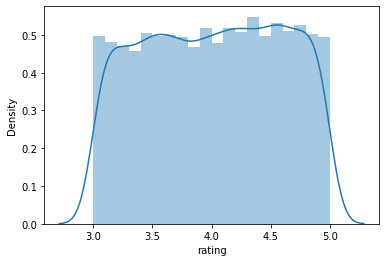

In [120]:
# Visualize the rating column again
sns.distplot(airbnb['rating'], bins = 20)
plt.show()

In [121]:
# Get the maximum
airbnb['rating'].max()

4.999561104773598

### Dealing with missing data

The `missingno` (imported as `msno`) package is great for visualizing missing data - we will be using:

- `msno.matrix()` visualizes a missingness matrix
- `msno.bar()` visualizes a missngness barplot
- `plt.show()` to show the plot

In [123]:
# airbnb.isna().sum()

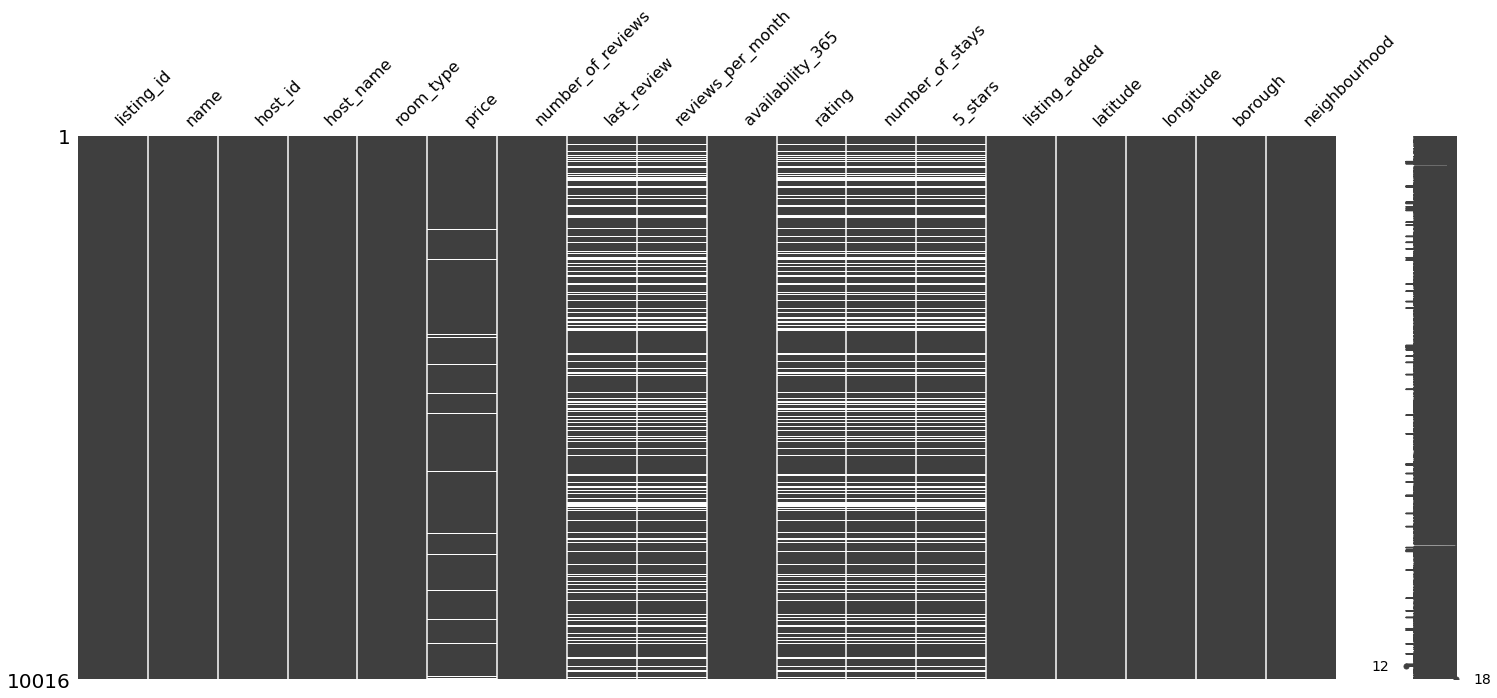

In [124]:
# Visualize the missingness 
msno.matrix(airbnb)
plt.show()

Looking at the missingness matrix, we can see that missing values are almost identical between `last_review`, `reviews_per_month`, `rating`, `number_of_stays`, and `5_stars`. Let's confirm this further by sorting on `rating`.

In [125]:
airbnb.sort_values(by = 'rating')

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood
2898,18582792,"""HELLO BROOKLYN"" PARK SIDE VIEW NEWLY RENO APT.",52403444,"R, J",Entire place,109.0,146,2019-06-24,5.57,21,3.000633,175.2,0.708806,2018-12-19,40.68914,-73.94556,Brooklyn,Bedford-Stuyvesant
6752,29617415,Spacious Manhattan room. Well lit! Always clean.,137358866,Kazuya,Private Room,40.0,2,2019-05-19,0.38,246,3.000692,2.4,0.766570,2018-11-13,40.81798,-73.94157,Manhattan,Harlem
8331,7310097,"3 Bedroom, 1st Fl, family apt.",38297695,Suvi,Entire place,200.0,1,2016-01-05,0.02,0,3.000725,1.2,0.693536,2015-07-02,40.67797,-73.97010,Brooklyn,Prospect Heights
2491,15756248,Glamorous upper west side Private room,12210788,Moustafa,Private Room,119.0,117,2019-06-09,3.61,365,3.000904,140.4,0.750403,2018-12-04,40.79516,-73.96813,Manhattan,Upper West Side
583,22316496,Cozy private room in the heart of Nolita / Soho,8726000,Larasati,Private Room,70.0,2,2019-02-25,0.11,0,3.001921,2.4,0.788342,2018-08-22,40.72347,-73.99302,Manhattan,Nolita
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,36347051,Beautiful Large Bedroom in the Heart of Harlem,273101668,Betty,Private Room,60.0,0,NaT,NaN,72,NaN,NaN,NaN,2018-04-18,40.83225,-73.94496,Manhattan,Harlem
9992,35805262,Discounted! Quiet 1 BR next to Times Square,10745276,Kortney William,Entire place,225.0,0,NaT,NaN,270,NaN,NaN,NaN,2018-08-02,40.75993,-73.99074,Manhattan,Hell's Kitchen
9995,28390924,Comfortable rooms 15 minutes to Manhattan,49568280,Hakan,Private Room,95.0,0,NaT,NaN,177,NaN,NaN,NaN,2018-06-09,40.77699,-73.91354,Queens,Ditmars Steinway
10004,9486332,Brand New Upper East Side!,49167534,Andrea,Entire place,175.0,0,NaT,NaN,0,NaN,NaN,NaN,2018-02-26,40.77281,-73.95822,Manhattan,Upper East Side


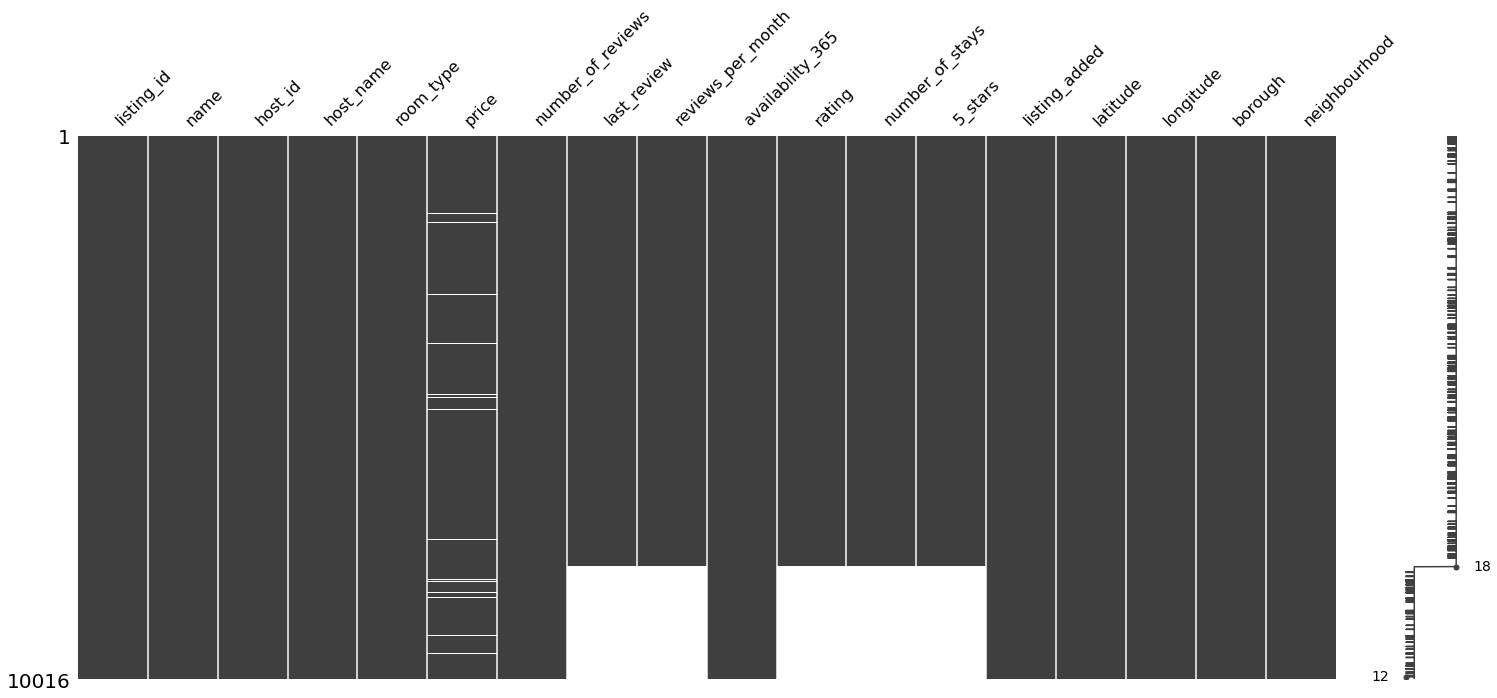

In [126]:
# Visualize the missingness on sorted values
msno.matrix(airbnb.sort_values(by = 'rating'))
plt.show()

<AxesSubplot:>

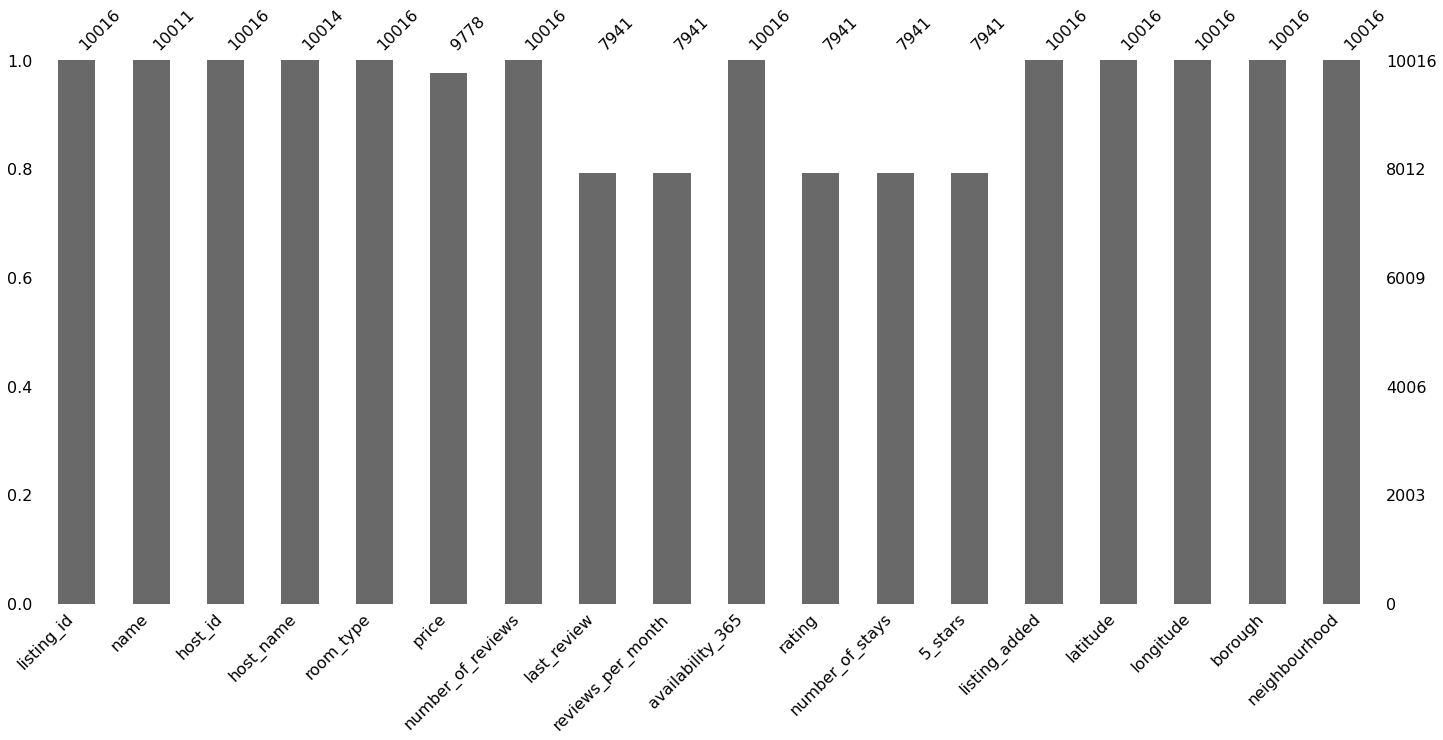

In [127]:
# Missingness barplot
msno.bar(airbnb)

**Treating the** `rating`, `number_of_stays`, `5_stars`, `reviews_per_month` **columns**

In [128]:
# Understand DataFrame with missing values in rating, number_of_stays, 5_stars, reviews_per_month
airbnb[airbnb['rating'].isna()].describe()

,listing_id,host_id,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars,latitude,longitude
count,2.075000e+03,2.075000e+03,2028.000000,2075.0,0.0,2075.000000,0.0,0.0,0.0,2075.000000,2075.000000
mean,2.274238e+07,8.022455e+07,191.553748,0.0,NaN,104.531566,NaN,NaN,NaN,40.732074,-73.956771
std,1.123730e+07,8.663163e+07,316.186639,0.0,NaN,138.266525,NaN,NaN,NaN,0.051168,0.041065
min,6.358800e+04,1.475100e+04,0.000000,0.0,NaN,0.000000,NaN,NaN,NaN,40.527000,-74.209410
25%,1.232923e+07,1.224305e+07,70.000000,0.0,NaN,0.000000,NaN,NaN,NaN,40.697845,-73.985185
50%,2.345182e+07,4.040116e+07,120.000000,0.0,NaN,7.000000,NaN,NaN,NaN,40.727790,-73.960940
75%,3.400364e+07,1.333498e+08,205.250000,0.0,NaN,211.000000,NaN,NaN,NaN,40.763480,-73.939540
max,3.648724e+07,2.741034e+08,5250.000000,0.0,NaN,365.000000,NaN,NaN,NaN,40.911690,-73.727310


In [129]:
# Understand DataFrame without missing values in rating, number_of_stays, 5_stars, reviews_per_month
airbnb[~airbnb['rating'].isna()].describe()

,listing_id,host_id,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars,latitude,longitude
count,7.941000e+03,7.941000e+03,7750.000000,7941.000000,7941.000000,7941.000000,7941.000000,7941.000000,7941.000000,7941.000000,7941.000000
mean,1.836419e+07,6.474110e+07,140.230581,28.336482,1.353901,114.320111,4.014050,34.003778,0.718540,40.728335,-73.950632
std,1.068788e+07,7.606089e+07,163.630337,46.746949,1.615659,129.789313,0.574787,56.096338,0.079927,0.055491,0.047017
min,3.831000e+03,2.787000e+03,0.000000,1.000000,0.010000,0.000000,3.000633,1.200000,0.600026,40.508680,-74.239860
25%,8.964308e+06,7.138163e+06,69.000000,3.000000,0.200000,0.000000,3.519751,3.600000,0.655573,40.688560,-73.982130
50%,1.927436e+07,2.947846e+07,105.000000,9.000000,0.700000,54.000000,4.027415,10.800000,0.709747,40.721820,-73.954410
75%,2.787660e+07,1.016578e+08,170.000000,32.000000,2.000000,229.000000,4.515626,38.400000,0.763948,40.763390,-73.934930
max,3.635113e+07,2.733615e+08,8000.000000,510.000000,16.220000,365.000000,4.999561,612.000000,0.939950,40.913060,-73.719280


Looking at the missing data in the DataFrame - we can see that `number_of_reviews` across all missing rows is 0. We can infer that these listings have never been visited - hence could be inferred they're inactive/have never been visited. 

We can impute them as following:

- Set `NaN` for `reviews_per_month`, `number_of_stays`, `5_stars` to 0.
- Since a `rating` did not happen, let's keep the column as is - but create a new column named `rated` that takes in `1` if yes, `0` if no.
- We will also leave `last_review` as is.


In [130]:
# Impute missing data
airbnb = airbnb.fillna({'reviews_per_month':0,
                        'number_of_stays':0,
                        '5_stars':0})

In [131]:
airbnb.isna().sum()

listing_id              0
name                    5
host_id                 0
host_name               2
room_type               0
price                 238
number_of_reviews       0
last_review          2075
reviews_per_month       0
availability_365        0
rating               2075
number_of_stays         0
5_stars                 0
listing_added           0
latitude                0
longitude               0
borough                 0
neighbourhood           0
dtype: int64

In [132]:
# Create is_rated column
is_rated = np.where(airbnb['rating'].isna() == True, 0, 1)

In [138]:
airbnb['is_rated'] = is_rated

In [140]:
airbnb.isna().sum()

listing_id              0
name                    5
host_id                 0
host_name               2
room_type               0
price                 238
number_of_reviews       0
last_review          2075
reviews_per_month       0
availability_365        0
rating               2075
number_of_stays         0
5_stars                 0
listing_added           0
latitude                0
longitude               0
borough                 0
neighbourhood           0
is_rated                0
dtype: int64

**Treating the** `price` **column**

In [141]:
# Investigate DataFrame with missing values in price
airbnb[airbnb['price'].isna()].describe()

,listing_id,host_id,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars,latitude,longitude,is_rated
count,2.380000e+02,2.380000e+02,0.0,238.000000,238.000000,238.000000,191.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,1.805656e+07,6.262965e+07,NaN,22.445378,1.117563,98.953782,4.078343,26.934454,0.577721,40.727270,-73.946071,0.802521
std,1.065176e+07,7.518785e+07,NaN,35.798003,1.666262,125.872256,0.568705,42.957603,0.297066,0.057426,0.048688,0.398936
min,8.092400e+04,1.145900e+05,NaN,0.000000,0.000000,0.000000,3.007359,0.000000,0.000000,40.581980,-74.160620,0.000000
25%,8.282298e+06,6.034050e+06,NaN,1.000000,0.080000,0.000000,3.646496,1.200000,0.613462,40.688043,-73.970362,1.000000
50%,1.863600e+07,2.809524e+07,NaN,6.000000,0.350000,23.000000,4.149203,7.200000,0.681884,40.719925,-73.951370,1.000000
75%,2.753759e+07,1.009006e+08,NaN,26.000000,1.435000,192.000000,4.538671,31.200000,0.746239,40.762030,-73.927908,1.000000
max,3.638875e+07,2.668265e+08,NaN,207.000000,8.870000,365.000000,4.957646,248.400000,0.934979,40.870390,-73.734620,1.000000


In [142]:
# Investigate DataFrame with missing values in price
airbnb[~airbnb['price'].isna()].describe()

,listing_id,host_id,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars,latitude,longitude,is_rated
count,9.778000e+03,9.778000e+03,9778.00000,9778.000000,9778.000000,9778.000000,7750.000000,9778.000000,9778.000000,9778.000000,9778.000000,9778.000000
mean,1.930078e+07,6.807826e+07,150.87523,22.466558,1.072341,112.616895,4.012465,26.959869,0.569485,40.729154,-73.952046,0.792596
std,1.095415e+07,7.869506e+07,205.86666,43.344327,1.536549,131.769744,0.574882,52.013192,0.299870,0.054575,0.045837,0.405468
min,3.831000e+03,2.787000e+03,0.00000,0.000000,0.000000,0.000000,3.000633,0.000000,0.000000,40.508680,-74.239860,0.000000
25%,9.696668e+06,7.952219e+06,69.00000,1.000000,0.040000,0.000000,3.518948,1.200000,0.611644,40.689912,-73.983030,1.000000
50%,2.012299e+07,3.167018e+07,106.00000,5.000000,0.375000,44.500000,4.024327,6.000000,0.681882,40.723095,-73.955580,1.000000
75%,2.938694e+07,1.074344e+08,180.00000,22.000000,1.550000,227.750000,4.514427,26.400000,0.750110,40.763438,-73.936217,1.000000
max,3.648724e+07,2.741034e+08,8000.00000,510.000000,16.220000,365.000000,4.999561,612.000000,0.939950,40.913060,-73.719280,1.000000


From a common sense perspective, the most predictive factor for a room's price is the `room_type` column, so let's visualize how price varies by room type with `sns.boxplot()` which displays the following information:


<p align="center">
<img src="https://github.com/adelnehme/cleaning-data-in-python-live-training/blob/master/boxplot.png?raw=true" alt = "DataCamp icon" width="80%">
</p>




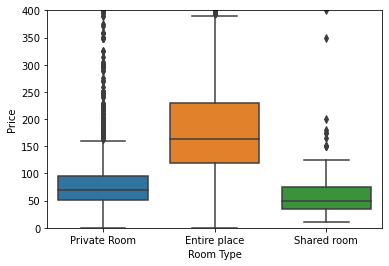

In [144]:
# Visualize relationship between price and room_type
sns.boxplot(x = 'room_type', y = 'price', data = airbnb)
plt.ylim(0, 400)
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

In [170]:
# 

list1 = list(range(1,50))
list1.extend([1000,2000,3000])

np.array(list1).mean()
# np.median(np.array(list1))

138.94230769230768

In [146]:
# Get median price per room_type
# airbnb.groupby('room_type').median()['price']
airbnb.groupby('room_type').mean()['price']

room_type
Entire place    209.662077
Private Room     88.025922
Shared room      70.410959
Name: price, dtype: float64

In [174]:
# Impute price based on conditions
airbnb.loc[(airbnb['price'].isna()) & (airbnb['room_type'] == 'Entire place'), 'price'] = 163.0
airbnb.loc[(airbnb['price'].isna()) & (airbnb['room_type'] == 'Private Room'), 'price'] = 70.0
airbnb.loc[(airbnb['price'].isna()) & (airbnb['room_type'] == 'Shared room'), 'price'] = 50.0

In [176]:
# Confirm price has been imputed
airbnb.isna().sum()
# airbnb['room_type'].value_counts()

listing_id              0
name                    5
host_id                 0
host_name               2
room_type               0
price                   0
number_of_reviews       0
last_review          2075
reviews_per_month       0
availability_365        0
rating               2075
number_of_stays         0
5_stars                 0
listing_added           0
latitude                0
longitude               0
borough                 0
neighbourhood           0
is_rated                0
dtype: int64

### What's still to be done?

Albeit we've done a significant amount of data cleaning tasks, there are still a couple of problems we have yet to diagnose. When cleaning data, we need to consider:

- Values that do not make any sense *(for example: are there values of `last_review` that older than `listing_added`? Are there listings in the future?*)
- Presence of duplicates values - and how to deal with them?

##### **Task 8:** Do we have consistent date data?

In [177]:
# Doing some sanity checks on date data
today = dt.date.today()

In [178]:
today

datetime.date(2023, 3, 12)

In [184]:
airbnb['last_review'].dt.week

<ipython-input-184-080141545143>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  airbnb['last_review'].dt.week


0        50.0
1        26.0
2         NaN
3        38.0
4        24.0
         ... 
10014    22.0
10015    18.0
10016    47.0
10017    22.0
10018    11.0
Name: last_review, Length: 10016, dtype: float64

In [185]:
# Are there reviews in the future?
airbnb[airbnb['last_review'].dt.date > today]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood,is_rated


In [186]:
# Are there listings in the future?
airbnb[airbnb['listing_added'].dt.date > today]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood,is_rated


In [188]:
# Drop these rows since they are only 4 rows
airbnb = airbnb[~(airbnb['listing_added'].dt.date > today)]

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood,is_rated
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,Private Room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398,Brooklyn,Flatlands,1
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,Entire place,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862,Manhattan,Upper West Side,1
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,Entire place,150.0,0,NaT,0.00,65,NaN,0.0,0.000000,2018-08-15,40.70070,-73.99517,Brooklyn,Brooklyn Heights,0
3,6425850,"Spacious, charming studio",32715865,Yelena,Entire place,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498,Manhattan,Upper West Side,1
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,Private Room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354,Manhattan,Lower East Side,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10014,22307861,Lovely 1BR Harlem apartment,16004068,Rachel,Entire place,105.0,4,2018-05-28,0.21,0,4.757555,4.8,0.639223,2017-11-22,40.80379,-73.95257,Manhattan,Harlem,1
10015,953275,Apartment For Your Holidays in NYC!,4460034,Alain,Entire place,125.0,50,2018-05-06,0.66,188,4.344704,60.0,0.648778,2017-10-31,40.79531,-73.93330,Manhattan,East Harlem,1
10016,3452835,"Artsy, Garden Getaway in Central Brooklyn",666862,Amy,Entire place,100.0,45,2016-11-27,0.98,0,3.966214,54.0,0.631713,2016-05-24,40.68266,-73.96743,Brooklyn,Clinton Hill,1
10017,23540194,"Immaculate townhouse in Clinton Hill, Brooklyn",67176930,Sophie,Entire place,450.0,2,2019-05-31,0.17,99,4.078581,2.4,0.703360,2018-11-25,40.68832,-73.96366,Brooklyn,Clinton Hill,1


In [193]:
# Are there any listings with listing_added > last_review
# inconsistent_dates = airbnb[airbnb['listing_added'].dt.date > airbnb['last_review'].dt.date]
inconsistent_dates

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood,is_rated
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,Private Room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354,Manhattan,Lower East Side,1
50,20783900,Marvelous Manhattan Marble Hill Private Suites,148960265,Randy,Private Room,93.0,7,2018-10-06,0.32,0,4.868036,8.4,0.609263,2020-02-17,40.87618,-73.91266,Manhattan,Marble Hill,1
60,1908852,Oversized Studio By Columbus Circle,684629,Alana,Entire place,189.0,7,2016-05-06,0.13,0,4.841204,8.4,0.725995,2017-09-17,40.77060,-73.98919,Manhattan,Upper West Side,1
124,28659894,Private bedroom in prime Bushwick! Near Trains!!!,216235179,Nina,Private Room,55.0,4,2019-04-12,0.58,358,4.916252,4.8,0.703117,2020-08-23,40.69988,-73.92072,Brooklyn,Bushwick,1
511,33619855,Modern & Spacious in trendy Crown Heights,253354074,Yehudis,Entire place,150.0,6,2019-05-27,2.50,148,3.462432,7.2,0.610929,2020-10-07,40.66387,-73.93840,Brooklyn,Crown Heights,1
521,25317793,Awesome Cozy Room in The Heart of Sunnyside!,136406167,Kara,Private Room,65.0,22,2019-06-11,1.63,131,4.442485,26.4,0.722388,2020-10-22,40.74090,-73.92696,Queens,Sunnyside,1


In [194]:
# Drop these rows since they are only 2 rows
airbnb.drop(inconsistent_dates.index, inplace = True)

##### **Task 9:** Let's deal with duplicate data


There are two notable types of duplicate data:

- Identical duplicate data across all columns
- Identical duplicate data cross most or some columns

To diagnose, and deal with duplicate data, we will be using the following methods and functions:

- `.duplicated(subset = , keep = )`
  - `subset` lets us pick one or more columns with duplicate values.
  - `keep` returns lets us return all instances of duplicate values.
- `.drop_duplicates(subset = , keep = )`
  

In [195]:
# Print the header of the DataFrame again
airbnb.head()

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood,is_rated
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,Private Room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398,Brooklyn,Flatlands,1
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,Entire place,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862,Manhattan,Upper West Side,1
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,Entire place,150.0,0,NaT,0.00,65,NaN,0.0,0.000000,2018-08-15,40.70070,-73.99517,Brooklyn,Brooklyn Heights,0
3,6425850,"Spacious, charming studio",32715865,Yelena,Entire place,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498,Manhattan,Upper West Side,1
5,271954,Beautiful brownstone apartment,1423798,Aj,Entire place,150.0,203,2019-06-20,2.22,300,4.478396,243.6,0.743500,2018-12-15,40.73388,-73.99452,Manhattan,Greenwich Village,1


In [197]:
airbnb['listing_id'].value_counts()

33346762    2
21106251    2
23990868    2
26554879    2
31470004    2
           ..
8307946     1
21700582    1
4976919     1
20572848    1
29507584    1
Name: listing_id, Length: 9990, dtype: int64

In [201]:
# Find duplicates
duplicates = airbnb.duplicated(subset = 'listing_id', keep = False)
print(duplicates.sum())

40


In [202]:
# Find duplicates
airbnb[duplicates].sort_values('listing_id')

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood,is_rated
1145,253806,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Entire place,199.0,43,2019-07-02,0.47,60,4.620238,51.6,0.861086,2018-12-27,40.73652,-73.95236,Brooklyn,Greenpoint,1
6562,253806,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Entire place,199.0,43,2019-07-02,0.47,60,4.620238,51.6,0.861086,2018-12-27,40.73652,-73.95236,Brooklyn,Greenpoint,1
8699,2044392,The heart of Williamsburg 2 bedroom,620218,Sarah,Entire place,245.0,0,NaT,0.00,0,NaN,0.0,0.000000,2018-08-09,40.71257,-73.96149,Brooklyn,Williamsburg,0
5761,2044392,The heart of Williamsburg 2 bedroom,620218,Sarah,Entire place,250.0,0,NaT,0.00,0,NaN,0.0,0.000000,2018-05-24,40.71257,-73.96149,Brooklyn,Williamsburg,0
4187,4244242,Best Bedroom in Bedstuy/Bushwick. Ensuite bath...,22023014,BrooklynSleeps,Private Room,73.0,110,2019-06-23,1.96,323,4.962314,132.0,0.809882,2018-12-18,40.69496,-73.93949,Brooklyn,Bedford-Stuyvesant,1
2871,4244242,Best Bedroom in Bedstuy/Bushwick. Ensuite bath...,22023014,BrooklynSleeps,Private Room,70.0,110,2019-06-23,1.96,323,4.962314,132.0,0.809882,2018-12-18,40.69496,-73.93949,Brooklyn,Bedford-Stuyvesant,1
77,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,Entire place,289.0,4,2016-05-22,0.09,225,3.903764,4.8,0.756381,2015-11-17,40.73813,-73.98098,Manhattan,Kips Bay,1
2255,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,Entire place,280.0,4,2016-05-22,0.09,225,3.903764,4.8,0.756381,2015-11-17,40.73813,-73.98098,Manhattan,Kips Bay,1
555,9078222,"Prospect Park 3 bdrm, Sleeps 8 (#2)",47219962,Babajide,Entire place,154.0,123,2019-07-01,2.74,263,3.466881,147.6,0.738191,2018-12-26,40.66086,-73.96159,Brooklyn,Prospect-Lefferts Gardens,1
7933,9078222,"Prospect Park 3 bdrm, Sleeps 8 (#2)",47219962,Babajide,Entire place,150.0,123,2019-07-01,2.74,263,3.466881,147.6,0.738191,2018-12-26,40.66086,-73.96159,Brooklyn,Prospect-Lefferts Gardens,1


In [203]:
# Remove identical duplicates
airbnb = airbnb.drop_duplicates()

In [204]:
# Find non-identical duplicates
duplicates = airbnb.duplicated(subset = 'listing_id', keep = False)

In [205]:
# Show all duplicates
airbnb[duplicates].sort_values('listing_id')

,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood,is_rated
5761,2044392,The heart of Williamsburg 2 bedroom,620218,Sarah,Entire place,250.0,0,NaT,0.00,0,NaN,0.0,0.000000,2018-05-24,40.71257,-73.96149,Brooklyn,Williamsburg,0
8699,2044392,The heart of Williamsburg 2 bedroom,620218,Sarah,Entire place,245.0,0,NaT,0.00,0,NaN,0.0,0.000000,2018-08-09,40.71257,-73.96149,Brooklyn,Williamsburg,0
2871,4244242,Best Bedroom in Bedstuy/Bushwick. Ensuite bath...,22023014,BrooklynSleeps,Private Room,70.0,110,2019-06-23,1.96,323,4.962314,132.0,0.809882,2018-12-18,40.69496,-73.93949,Brooklyn,Bedford-Stuyvesant,1
4187,4244242,Best Bedroom in Bedstuy/Bushwick. Ensuite bath...,22023014,BrooklynSleeps,Private Room,73.0,110,2019-06-23,1.96,323,4.962314,132.0,0.809882,2018-12-18,40.69496,-73.93949,Brooklyn,Bedford-Stuyvesant,1
77,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,Entire place,289.0,4,2016-05-22,0.09,225,3.903764,4.8,0.756381,2015-11-17,40.73813,-73.98098,Manhattan,Kips Bay,1
2255,7319856,450ft Square Studio in Gramercy NY,11773680,Adam,Entire place,280.0,4,2016-05-22,0.09,225,3.903764,4.8,0.756381,2015-11-17,40.73813,-73.98098,Manhattan,Kips Bay,1
555,9078222,"Prospect Park 3 bdrm, Sleeps 8 (#2)",47219962,Babajide,Entire place,154.0,123,2019-07-01,2.74,263,3.466881,147.6,0.738191,2018-12-26,40.66086,-73.96159,Brooklyn,Prospect-Lefferts Gardens,1
7933,9078222,"Prospect Park 3 bdrm, Sleeps 8 (#2)",47219962,Babajide,Entire place,150.0,123,2019-07-01,2.74,263,3.466881,147.6,0.738191,2018-12-26,40.66086,-73.96159,Brooklyn,Prospect-Lefferts Gardens,1
1481,15027024,Newly renovated 1bd on lively & historic St Marks,8344620,Ethan,Entire place,180.0,10,2018-12-31,0.30,0,3.969729,12.0,0.772513,2018-06-27,40.72693,-73.98385,Manhattan,East Village,1
3430,15027024,Newly renovated 1bd on lively & historic St Marks,8344620,Ethan,Entire place,180.0,10,2018-12-31,0.30,0,3.869729,12.0,0.772513,2018-06-27,40.72693,-73.98385,Manhattan,East Village,1


To treat identical duplicates across some columns, we will chain the `.groupby()` and `.agg()` methods where we group by the column used to find duplicates (`listing_id`) and aggregate across statistical measures for `price`, `rating` and `list_added`. The `.agg()` method takes in a dictionary with each column's aggregation method - we will use the following aggregations:

- `mean` for `price` and `rating` columns
- `max` for `listing_added` column
- `first` for all remaining column

*A note on dictionary comprehensions:*

Dictionaries are useful data structures in Python with the following format
`my_dictionary = {key: value}` where a `key` is mapped to a `value` and whose `value` can be returned with `my_dictionary[key]` - dictionary comprehensions allow us to programmatically create dicitonaries using the structure:

```
{x: x*2 for x in [1,2,3,4,5]} 
{1:2, 2:4, 3:6, 4:8, 5:10}
```

In [210]:
# Get column names from airbnb
column_names = airbnb.columns
column_names

Index(['listing_id', 'name', 'host_id', 'host_name', 'room_type', 'price',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'availability_365', 'rating', 'number_of_stays', '5_stars',
       'listing_added', 'latitude', 'longitude', 'borough', 'neighbourhood',
       'is_rated'],
      dtype='object')

In [209]:
column_names.difference(['listing_id', 'listing_added', 'rating', 'price'])

Index(['5_stars', 'availability_365', 'borough', 'host_id', 'host_name',
       'is_rated', 'last_review', 'latitude', 'longitude', 'name',
       'neighbourhood', 'number_of_reviews', 'number_of_stays',
       'reviews_per_month', 'room_type'],
      dtype='object')

In [207]:
for column_name in column_names.difference(['listing_id', 'listing_added', 'rating', 'price']):
    print(column_name,'first') 

5_stars first
availability_365 first
borough first
host_id first
host_name first
is_rated first
last_review first
latitude first
longitude first
name first
neighbourhood first
number_of_reviews first
number_of_stays first
reviews_per_month first
room_type first


In [211]:
# Create dictionary comprehension with 'first' as value for all columns not being aggregated
aggregations = {column_name:'first' for column_name in column_names.difference(['listing_id', 'listing_added', 'rating', 'price'])}
aggregations['price'] = 'mean'
aggregations['rating'] = 'mean'
aggregations['listing_added'] = 'max'
aggregations

{'5_stars': 'first',
 'availability_365': 'first',
 'borough': 'first',
 'host_id': 'first',
 'host_name': 'first',
 'is_rated': 'first',
 'last_review': 'first',
 'latitude': 'first',
 'longitude': 'first',
 'name': 'first',
 'neighbourhood': 'first',
 'number_of_reviews': 'first',
 'number_of_stays': 'first',
 'reviews_per_month': 'first',
 'room_type': 'first',
 'price': 'mean',
 'rating': 'mean',
 'listing_added': 'max'}

In [212]:
# Remove non-identical duplicates
# airbnb = airbnb.groupby('listing_id').agg(aggregations).reset_index()
airbnb.groupby('listing_id').agg(aggregations).reset_index()

,listing_id,5_stars,availability_365,borough,host_id,host_name,is_rated,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,number_of_stays,reviews_per_month,room_type,price,rating,listing_added
0,3831,0.757366,194,Brooklyn,4869,LisaRoxanne,1,2019-07-05,40.68514,-73.95976,Cozy Entire Floor of Brownstone,Clinton Hill,270,324.0,4.64,Entire place,89.0,3.273935,2018-12-30
1,6848,0.789743,46,Brooklyn,15991,Allen & Irina,1,2019-06-29,40.70837,-73.95352,Only 2 stops to Manhattan studio,Williamsburg,148,177.6,1.20,Entire place,140.0,3.495760,2018-12-24
2,7322,0.669873,12,Manhattan,18946,Doti,1,2019-07-01,40.74192,-73.99501,Chelsea Perfect,Chelsea,260,312.0,2.12,Private Room,140.0,4.389051,2018-12-26
3,7726,0.640251,21,Brooklyn,20950,Adam And Charity,1,2019-06-22,40.67592,-73.94694,Hip Historic Brownstone Apartment with Backyard,Crown Heights,53,63.6,4.44,Entire place,99.0,3.305382,2018-12-17
4,12303,0.918593,311,Brooklyn,47618,Yolande,1,2018-09-30,40.69673,-73.97584,1bdr w private bath. in lofty apt,Fort Greene,25,30.0,0.23,Private Room,120.0,4.568745,2018-03-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,36479230,0.000000,16,Brooklyn,65767720,Melanie,0,NaT,40.70418,-73.91471,Studio sized room with beautiful light,Bushwick,0,0.0,0.00,Private Room,42.0,NaN,2018-08-21
9986,36484665,0.000000,9,Brooklyn,8232441,Sabrina,0,NaT,40.67853,-73.94995,Charming one bedroom - newly renovated rowhouse,Bedford-Stuyvesant,0,0.0,0.00,Private Room,70.0,NaN,2018-04-19
9987,36485057,0.000000,36,Brooklyn,6570630,Marisol,0,NaT,40.70184,-73.93317,Affordable room in Bushwick/East Williamsburg,Bushwick,0,0.0,0.00,Private Room,40.0,NaN,2018-07-06
9988,36485431,0.000000,27,Manhattan,23492952,Ilgar & Aysel,0,NaT,40.81475,-73.94867,Sunny Studio at Historical Neighborhood,Harlem,0,0.0,0.00,Entire place,115.0,NaN,2018-07-26


In [ ]:
# Make sure no duplication happened
airbnb[airbnb.duplicated('listing_id', keep = False)]

In [ ]:
# Print header of DataFrame
airbnb.head()

Try to answer the following questions about the dataset:

- What is the average price of listings by borough? Visualize your results with a bar plot!
- What is the average availability in days of listings by borough? Visualize your results with a bar plot!
- What is the median price per room type in each borough? Visualize your results with a bar plot!
- Visualize the number of listings over time.

**Functions that should/could be used:**
- `.groupby()` and `.agg(})`
- `sns.barplot(x = , y = , hue = , data = )`
- `sns.lineplot(x = , y = , data = )`
- `.dt.strftime()` for extracting specific dates from a `datetime` column